# Example showing the output produced by the photoionization models

In [64]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

from astropy.table import Table
import pandas as pd

### Loading in the line labels, luminosity and parameter value files

In [65]:
all_labels = np.load('../models/test_model_high_res/full_model_high_res_age_2Myr_unattenuated_emission_line_labels.npy')
all_labels_dict = dict(zip(all_labels, range(len(all_labels))))
all_line_luminosities = np.load('../models/test_model_high_res/full_model_high_res_age_2Myr_unattenuated_emission_line_luminosity_file.npy')
parameter_values = np.load('../models/test_model_high_res/full_model_high_res_age_2Myr_unattenuated_parameters_file.npy')
all_line_luminosities.shape

(24, 55, 9, 68)

### Luminosity and parameter files are structured in multidimensional way
- Dimension 1: Metallicities
- Dimension 2: Ionization parameter
- Dimension 3: Dust-to-metal ratio
- Dimension 4: Dust attenuation
- The last dimension in the parameter file has the parameter values of the main parameters (as listed above) + derived parameters. The last dimension of the luminosity file contains the luminosities of all the emission lines in the line labels file.

In [66]:
parameter_values.shape

(24, 55, 9, 3)

In [67]:
all_line_luminosities.shape

(24, 55, 9, 68)

### import sdss data

In [68]:
#SDSS DR7 table with SpecObjIDs for crossmatching and other measurements
sdss_specobjall_dr7 = Table.read("/Users/dirk/Documents/PhD/scripts/catalogs/SpecObjAll_dr7.fits").to_pandas()

#SDSS DR7 table with galaxy emission line fluxes
sdss_gal_line_dr7 = Table.read("/Users/dirk/Documents/PhD/scripts/catalogs/gal_line_dr7_v5_2.fit").to_pandas()

sdss = pd.concat([sdss_specobjall_dr7[["SPECOBJID","MJD","Z"]], sdss_gal_line_dr7], axis=1)

#sdss.columns.to_list()

### Plotting the modelled emission line ratios in a BPT diagram

40 42 51 52


/Users/dirk/opt/anaconda3/envs/CloudyGalaxy/lib/python3.9/site-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/dirk/opt/anaconda3/envs/CloudyGalaxy/lib/python3.9/site-packages/pandas/core/arraylike.py:364: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


(-1.0, 1.5)

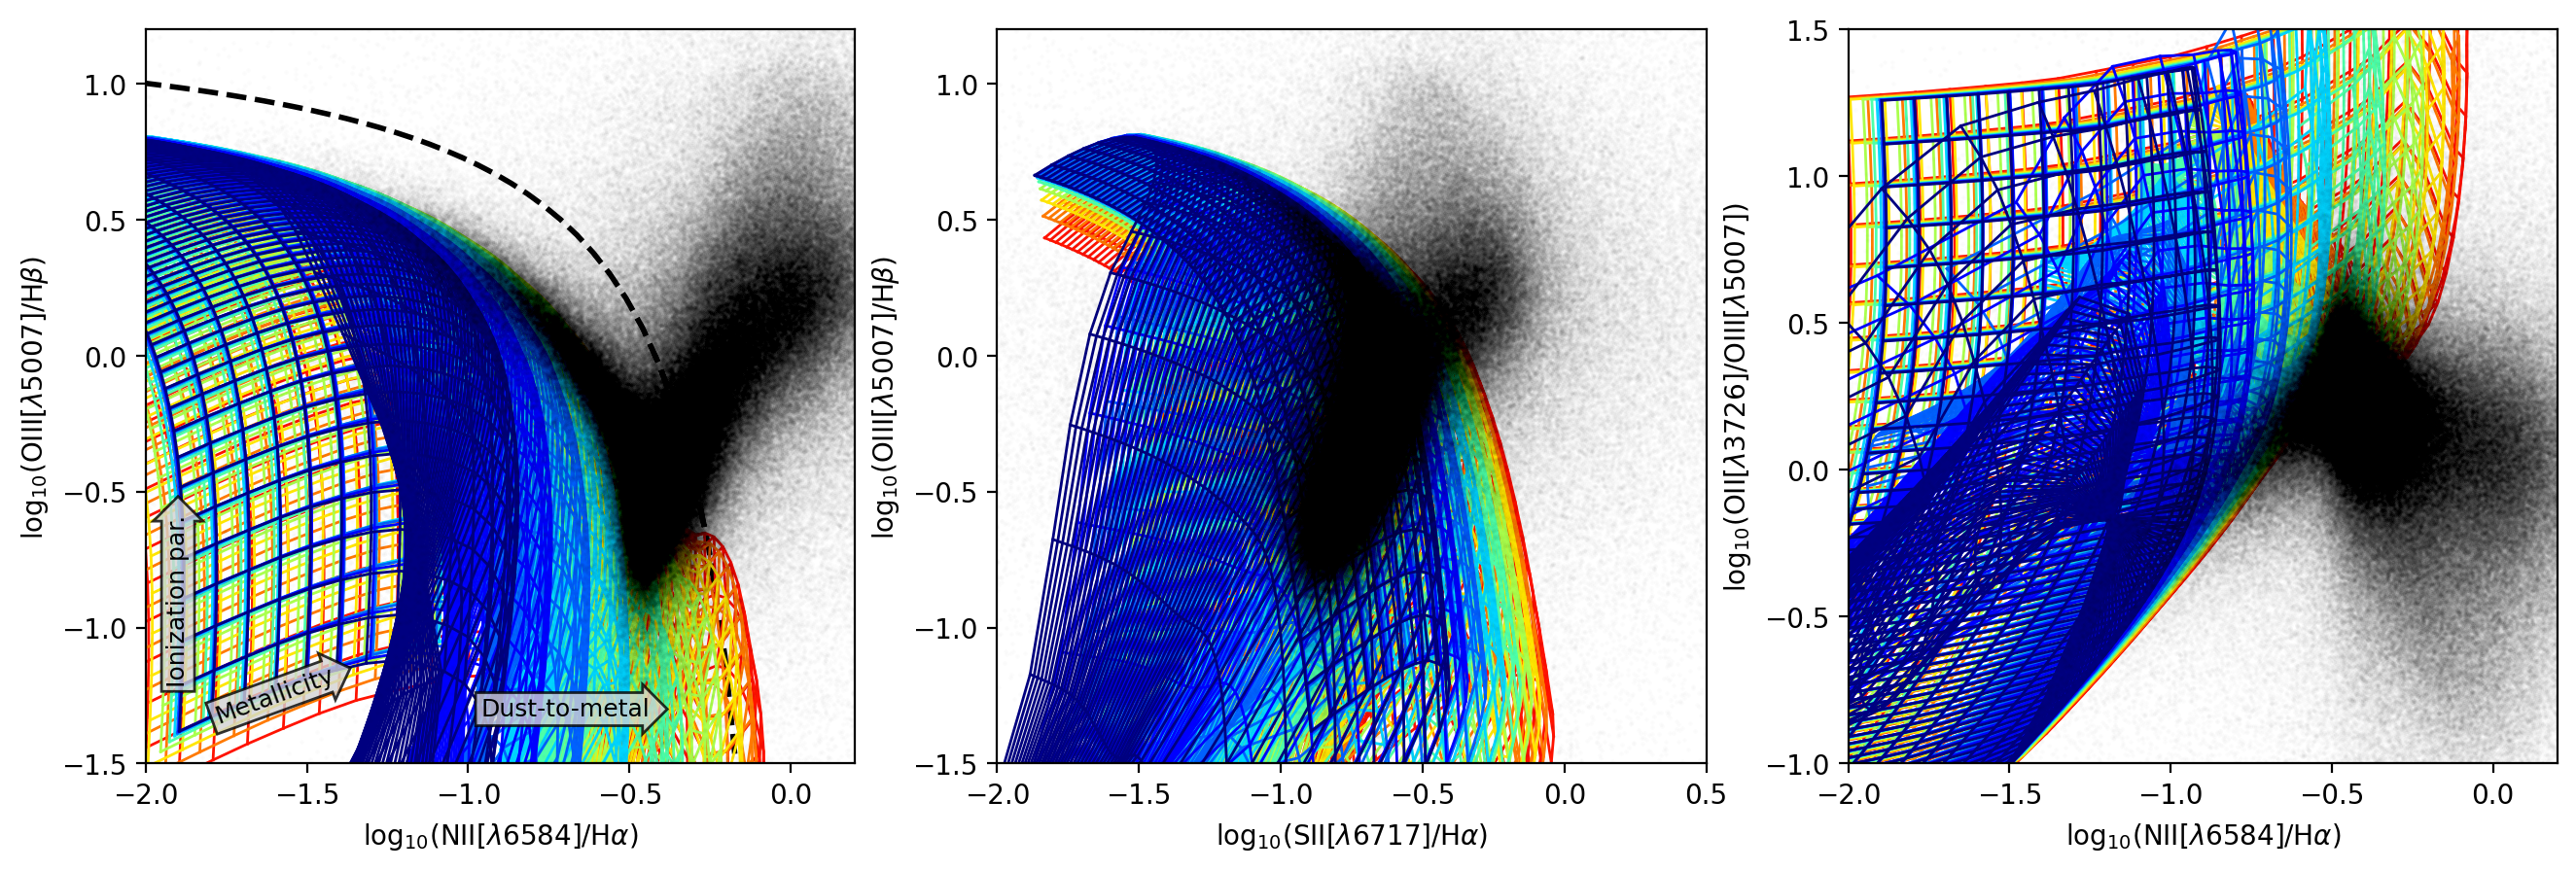

In [84]:
labels = ['O__2_372603A', 'H__1_486133A', 'O__3_500684A', 'H__1_656281A', 'N__2_658345A', 'S__2_671644A']
OII, Hb, OIII, Ha, NII, SII = [all_labels_dict.get(key) for key in labels]
print(Hb, OIII, Ha, NII)
colors = matplotlib.cm.get_cmap('jet')

fig, (ax1, ax2, ax3) = plt.subplots(1,3,dpi=200, figsize = (16,5))
line=np.linspace(-2.5,0.0)
ax1.plot(line, 0.61/(line-0.05) + 1.3, c='k', linestyle='--', linewidth=2)

ax1.scatter(np.log10(sdss['NII_6584_FLUX']/sdss['H_ALPHA_FLUX']), np.log10(sdss['OIII_5007_FLUX']/sdss['H_BETA_FLUX']), s=0.5, c='k', alpha =0.01, zorder=3)
ax2.scatter(np.log10(sdss['SII_6717_FLUX']/sdss['H_ALPHA_FLUX']), np.log10(sdss['OIII_5007_FLUX']/sdss['H_BETA_FLUX']), s=0.5, c='k', alpha =0.01, zorder=3)
ax3.scatter(np.log10(sdss['NII_6584_FLUX']/sdss['H_ALPHA_FLUX']), np.log10(sdss['OII_3726_FLUX']/sdss['OIII_5007_FLUX']), s=0.5, c='k', alpha =0.01, zorder=3)

for i in np.arange(0,9)[::-1]:
    ax1.plot(np.log10(all_line_luminosities[:,:,i,NII]/all_line_luminosities[:,:,i,Ha]), 
             np.log10(all_line_luminosities[:,:,i,OIII]/all_line_luminosities[:,:,i,Hb]), c=colors(i/9), linewidth=1)
    ax1.plot(np.log10(all_line_luminosities[:,:,i,NII]/all_line_luminosities[:,:,i,Ha]).T, 
             np.log10(all_line_luminosities[:,:,i,OIII]/all_line_luminosities[:,:,i,Hb]).T, c=colors(i/9), linewidth=1)
    ax2.plot(np.log10(all_line_luminosities[:,:,i,SII]/all_line_luminosities[:,:,i,Ha]), 
             np.log10(all_line_luminosities[:,:,i,OIII]/all_line_luminosities[:,:,i,Hb]), c=colors(i/9), linewidth=1)
    ax2.plot(np.log10(all_line_luminosities[:,:,i,SII]/all_line_luminosities[:,:,i,Ha]).T, 
             np.log10(all_line_luminosities[:,:,i,OIII]/all_line_luminosities[:,:,i,Hb]).T, c=colors(i/9), linewidth=1)
    ax3.plot(np.log10(all_line_luminosities[:,:,i,NII]/all_line_luminosities[:,:,i,Ha]), 
             np.log10(all_line_luminosities[:,:,i,OII]/all_line_luminosities[:,:,i,OIII]), c=colors(i/9), linewidth=1)
    ax3.plot(np.log10(all_line_luminosities[:,:,i,NII]/all_line_luminosities[:,:,i,Ha]).T, 
             np.log10(all_line_luminosities[:,:,i,OII]/all_line_luminosities[:,:,i,OIII]).T, c=colors(i/9), linewidth=1)

# Arrow Metallicity
bbox_props = dict(boxstyle="rarrow", fc='lightgrey', ec="k", lw=1, alpha=0.8)
t = ax1.text(-1.6, -1.25, "Metallicity", ha="center", va="center", rotation=20,
            size=9,
            bbox=bbox_props)

bb = t.get_bbox_patch()
bb.set_boxstyle("rarrow", pad=0.2)

# Arrow Ionization parameter
bbox_props = dict(boxstyle="rarrow", fc='lightgrey', ec="k", lw=1, alpha=0.8)
t = ax1.text(-1.9, -0.9, "Ionization par.", ha="center", va="center", rotation=90,
            size=9,
            bbox=bbox_props)

bb = t.get_bbox_patch()
bb.set_boxstyle("rarrow", pad=0.2)

# Arrow Dust-to-metal
bbox_props = dict(boxstyle="rarrow", fc='lightgrey', ec="k", lw=1, alpha=0.8)
t = ax1.text(-0.7, -1.3, "Dust-to-metal", ha="center", va="center", rotation=0,
            size=9,
            bbox=bbox_props)

bb = t.get_bbox_patch()
bb.set_boxstyle("rarrow", pad=0.2)

ax1.set_xlabel('log$_{10}$(NII[$\\lambda$6584]/H$\\alpha$)')
ax1.set_ylabel('log$_{10}$(OIII[$\\lambda$5007]/H$\\beta$)')
ax1.set_xlim(-2.0,0.2)
ax1.set_ylim(-1.5,1.2)

ax2.set_xlabel('log$_{10}$(SII[$\\lambda$6717]/H$\\alpha$)')
ax2.set_ylabel('log$_{10}$(OIII[$\\lambda$5007]/H$\\beta$)')
ax2.set_xlim(-2.0,0.5)
ax2.set_ylim(-1.5,1.2)

ax3.set_xlabel('log$_{10}$(NII[$\\lambda$6584]/H$\\alpha$)')
ax3.set_ylabel('log$_{10}$(OII[$\\lambda$3726]/OIII[$\\lambda$5007])')
ax3.set_xlim(-2.0,0.2)
ax3.set_ylim(-1.,1.5)